# 导入相应的库

In [4]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.nn import Conv1d, ReLU, MaxPool1d, Linear, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import KFold

# 定义1维卷积神经网络

In [5]:
class ConvRegressionNet(nn.Module):
    def __init__(self):
        super(ConvRegressionNet, self).__init__()
        self.model = nn.Sequential(
            Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            ReLU(),
            MaxPool1d(kernel_size=2),
            Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            ReLU(),
            MaxPool1d(kernel_size=2),
            Flatten(),
            Linear(160, 128),
            ReLU(),
            Linear(128, 1),
        )

    def forward(self, x):
        x = self.model(x)
        return x

# 导入数据

In [6]:
data_path = "D:\\pycharm\\Folder\\UHPC_brams_shear_strength_ConvNN\\Shear strength_UHPC beams.xlsx"
data = pd.read_excel(data_path)
print(data.head())

     h      b  bf1  tf1  bf2  tf2       Ac    ρl    fsy   ρp  ...    s  ρsv  \
0  220  120.0    0  0.0    0  0.0  26400.0  0.04  550.0  0.0  ...  0.0  0.0   
1  220  120.0    0  0.0    0  0.0  26400.0  0.04  550.0  0.0  ...  0.0  0.0   
2  220  120.0    0  0.0    0  0.0  26400.0  0.04  550.0  0.0  ...  0.0  0.0   
3  220  120.0    0  0.0    0  0.0  26400.0  0.04  550.0  0.0  ...  0.0  0.0   
4  220  120.0    0  0.0    0  0.0  26400.0  0.04  550.0  0.0  ...  0.0  0.0   

   fsv     fc   ρf    lf   df        λf    m     Vu  
0  0.0  103.0  0.0   0.0  0.0  0.000000  2.5  107.0  
1  0.0  122.0  2.0  19.0  0.2  1.653571  2.5  184.0  
2  0.0  103.0  0.0   0.0  0.0  0.000000  3.0   42.5  
3  0.0  122.0  2.0  19.0  0.2  1.653571  3.0  177.0  
4  0.0  122.0  2.0  19.0  0.2  1.653571  3.0  177.5  

[5 rows x 21 columns]


# 处理数据，采用10折交叉验证方法

In [7]:
X = data.iloc[:, :20].values
y = data.iloc[:, 20].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
print(y.shape)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
kf = KFold(n_splits=10, shuffle=True, random_state=10)

(532, 20)
(532,)


# 初始化网络

In [8]:
model1 = ConvRegressionNet()
criterion = nn.MSELoss()
Learning_rate = 0.001
optimizer = optim.Adam(model1.parameters(), lr=Learning_rate)

# 训练网络，验证网络

训练loss值是：135117.84375
训练loss值是：117953.046875
训练loss值是：89168.578125
训练loss值是：47438.23828125
训练loss值是：33528.4609375
训练loss值是：28693.025390625
训练loss值是：25075.34375
训练loss值是：21339.341796875
训练loss值是：17667.744140625
训练loss值是：14880.7939453125
-----验证集结果-----
验证集loss：14399.2392578125，验证集MAPE：33.78670120239258，验证集R2：0.8822222486670528


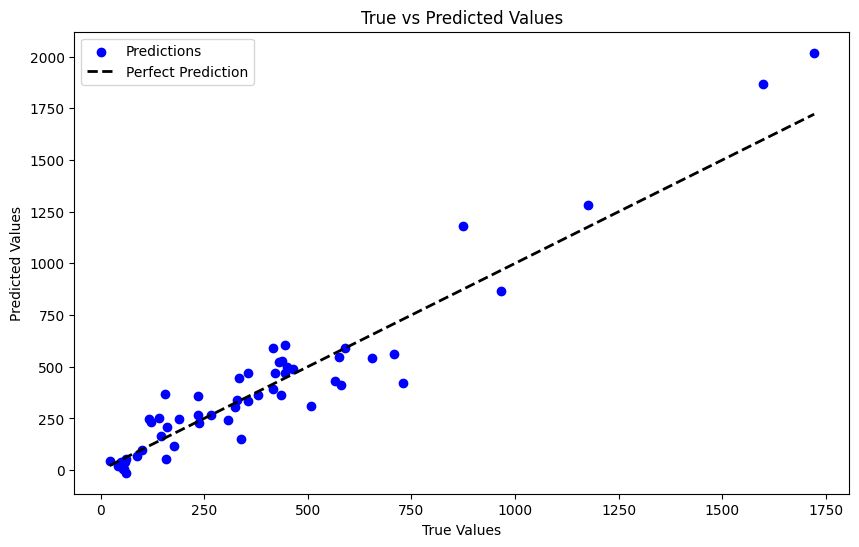

训练loss值是：12445.49609375
训练loss值是：11037.9326171875
训练loss值是：9820.376953125
训练loss值是：8731.6552734375
训练loss值是：7794.263671875
训练loss值是：6986.453125
训练loss值是：6232.3017578125
训练loss值是：5454.07568359375
训练loss值是：4763.3251953125
训练loss值是：4141.68603515625
-----验证集结果-----
验证集loss：8578.5595703125，验证集MAPE：16.396709442138672，验证集R2：0.939047678807487


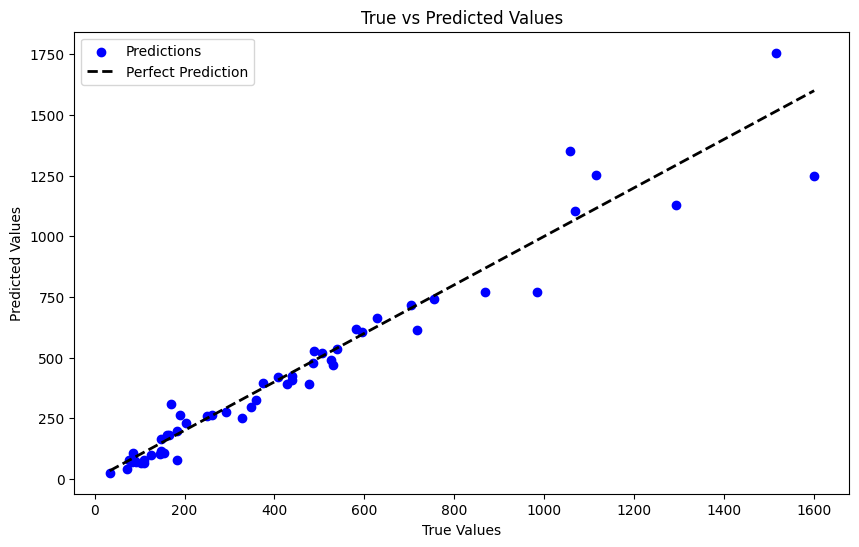

训练loss值是：3687.984619140625
训练loss值是：3154.829833984375
训练loss值是：2730.156494140625
训练loss值是：2372.760498046875
训练loss值是：2089.60498046875
训练loss值是：1875.1151123046875
训练loss值是：1716.25341796875
训练loss值是：1586.865478515625
训练loss值是：1479.29345703125
训练loss值是：1379.0213623046875
-----验证集结果-----
验证集loss：3800.74267578125，验证集MAPE：20.074668884277344，验证集R2：0.9780104975959105


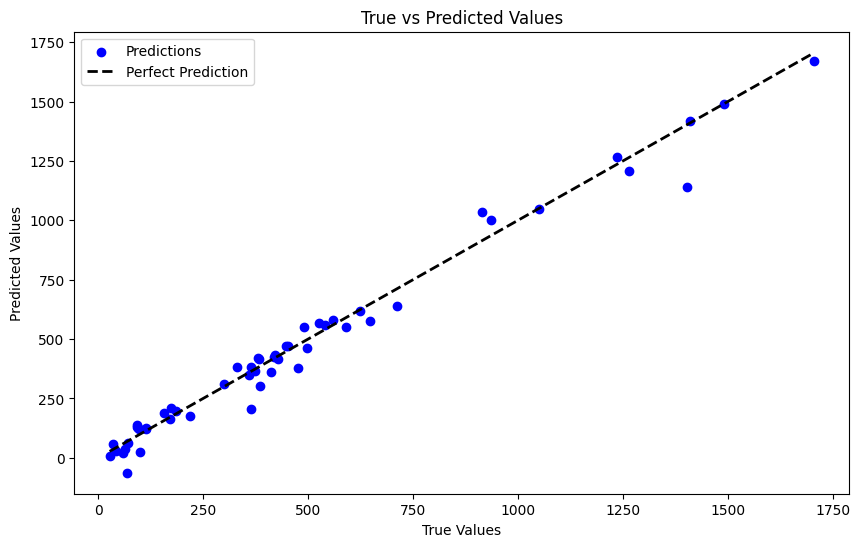

训练loss值是：1407.607421875
训练loss值是：1271.8951416015625
训练loss值是：1173.953369140625
训练loss值是：1096.744384765625
训练loss值是：1030.7481689453125
训练loss值是：976.6483764648438
训练loss值是：931.6034545898438
训练loss值是：892.2496337890625
训练loss值是：858.1332397460938
训练loss值是：825.9620361328125
-----验证集结果-----
验证集loss：2564.38232421875，验证集MAPE：14.496064186096191，验证集R2：0.9802889582466783


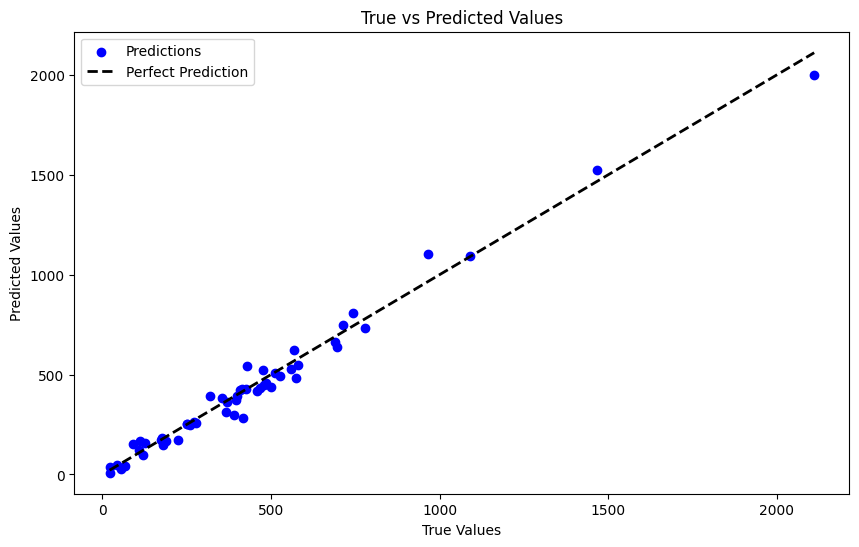

训练loss值是：905.3514404296875
训练loss值是：854.7465209960938
训练loss值是：816.23583984375
训练loss值是：786.560546875
训练loss值是：762.66796875
训练loss值是：735.9205932617188
训练loss值是：715.809326171875
训练loss值是：701.9785766601562
训练loss值是：683.6512451171875
训练loss值是：672.8842163085938
-----验证集结果-----
验证集loss：1520.068603515625，验证集MAPE：12.9071044921875，验证集R2：0.9899186001671172


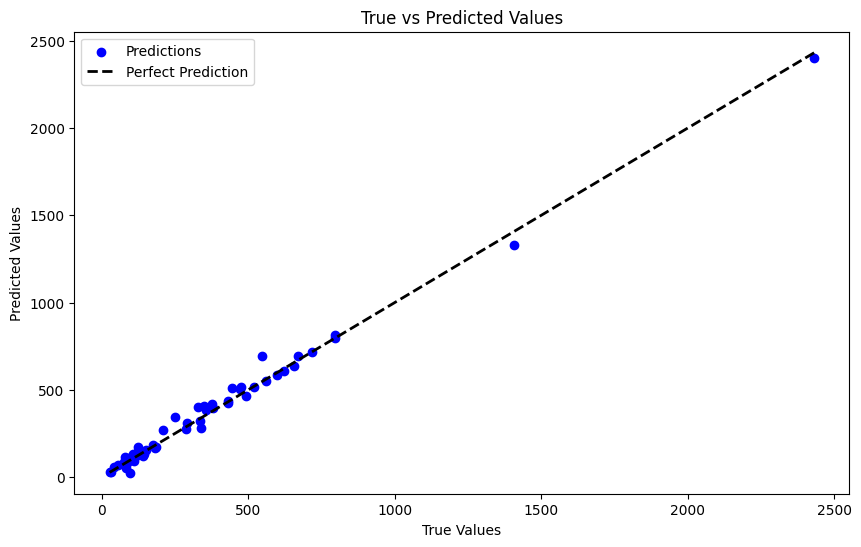

训练loss值是：487.3642578125
训练loss值是：459.9128112792969
训练loss值是：445.7113037109375
训练loss值是：430.8615417480469
训练loss值是：423.6934814453125
训练loss值是：412.9903564453125
训练loss值是：400.14166259765625
训练loss值是：394.8355407714844
训练loss值是：386.7352294921875
训练loss值是：379.0364074707031
-----验证集结果-----
验证集loss：3822.3740234375，验证集MAPE：10.932092666625977，验证集R2：0.9656175801954001


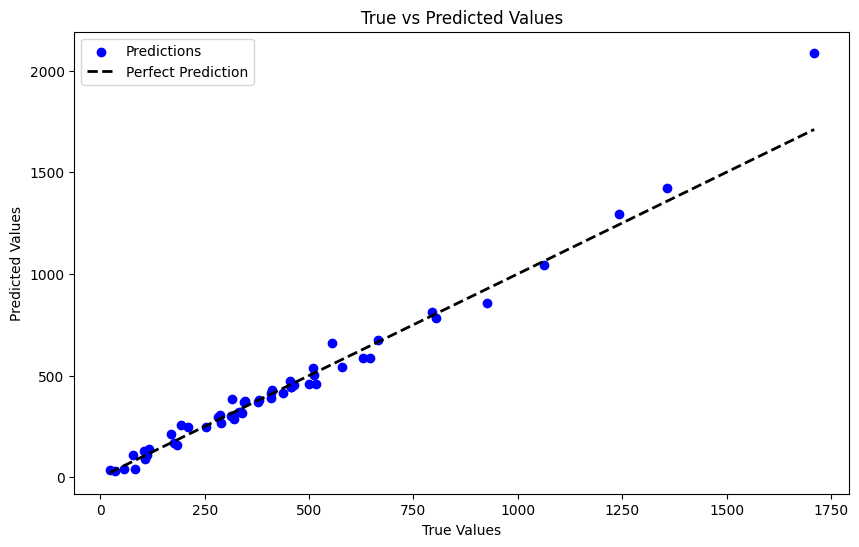

训练loss值是：609.0375366210938
训练loss值是：590.5988159179688
训练loss值是：576.7107543945312
训练loss值是：569.4727172851562
训练loss值是：560.7156372070312
训练loss值是：554.4560546875
训练loss值是：543.1032104492188
训练loss值是：537.0867309570312
训练loss值是：533.0040283203125
训练loss值是：527.0736083984375
-----验证集结果-----
验证集loss：616.364013671875，验证集MAPE：9.386491775512695，验证集R2：0.9837687701808198


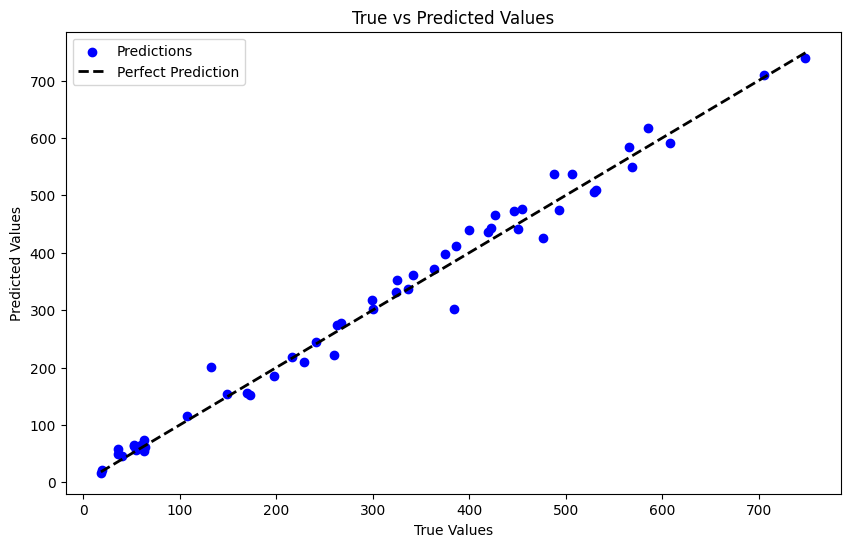

训练loss值是：533.2385864257812
训练loss值是：519.1497802734375
训练loss值是：512.4057006835938
训练loss值是：500.996826171875
训练loss值是：498.6794128417969
训练loss值是：490.73358154296875
训练loss值是：485.3792419433594
训练loss值是：477.96697998046875
训练loss值是：473.0567626953125
训练loss值是：466.3435363769531
-----验证集结果-----
验证集loss：724.9219970703125，验证集MAPE：10.536516189575195，验证集R2：0.9953576283486434


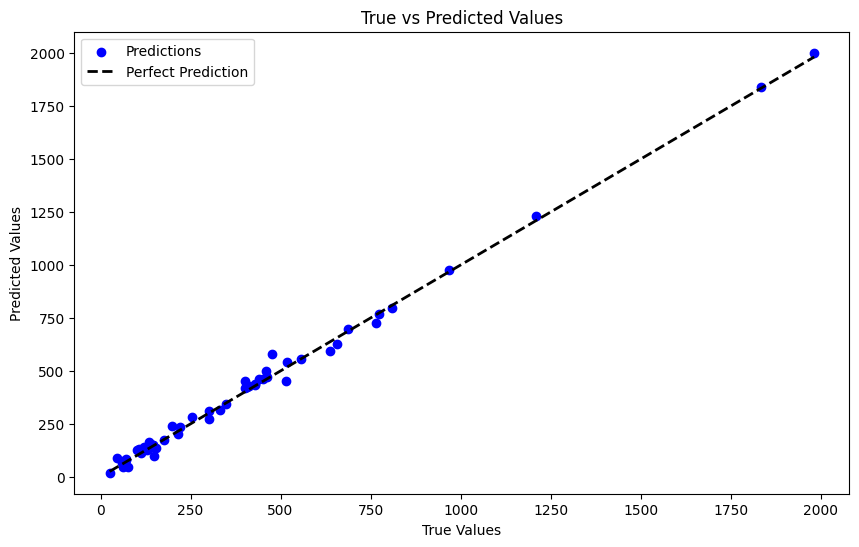

训练loss值是：446.887451171875
训练loss值是：435.4601135253906
训练loss值是：423.4255065917969
训练loss值是：417.409912109375
训练loss值是：415.7397766113281
训练loss值是：409.1319580078125
训练loss值是：402.1331481933594
训练loss值是：399.8503112792969
训练loss值是：398.0906066894531
训练loss值是：392.5945739746094
-----验证集结果-----
验证集loss：2053.0322265625，验证集MAPE：9.118889808654785，验证集R2：0.9924599006453748


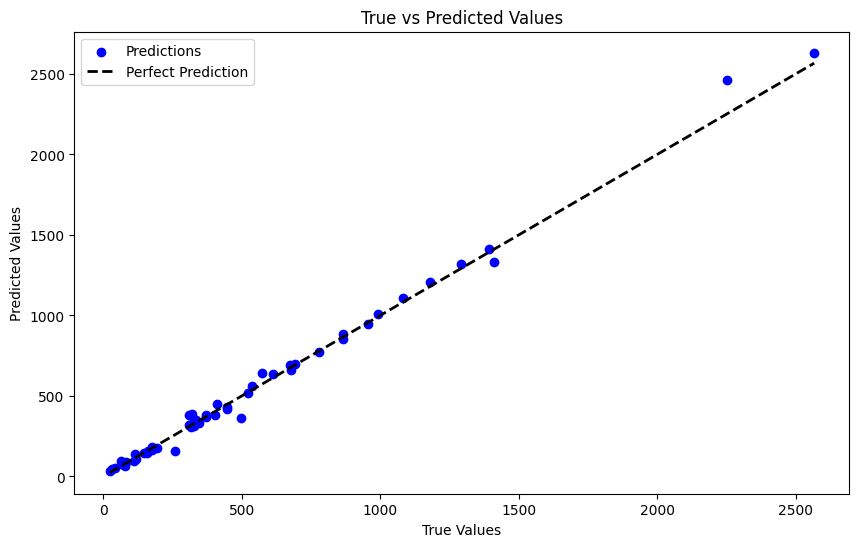

训练loss值是：204.79852294921875
训练loss值是：191.56105041503906
训练loss值是：183.26409912109375
训练loss值是：183.17298889160156
训练loss值是：172.1402587890625
训练loss值是：171.90293884277344
训练loss值是：165.84976196289062
训练loss值是：165.55191040039062
训练loss值是：158.5333709716797
训练loss值是：160.53921508789062
-----验证集结果-----
验证集loss：6357.0703125，验证集MAPE：8.686511993408203，验证集R2：0.9796587647428194


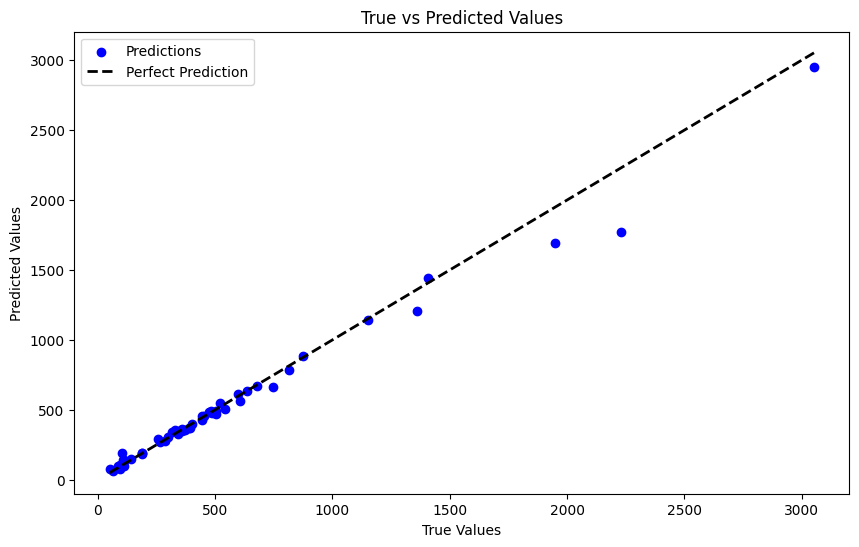

In [9]:
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tensor)):
    # print(f"Train Index:{train_idx}")
    # print(f"Test Index:{test_idx}")
    X_train, y_train = X_tensor[train_idx], y_tensor[train_idx]
    X_test, y_test = X_tensor[test_idx], y_tensor[test_idx]
    # print(X_train.shape)
    # print(X_test.shape)

    epoch = 1000
    for i in range(epoch):
        model1.train()
        outputs = model1(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print("训练loss值是：{}".format(loss.item()))

    model1.eval()
    with torch.no_grad():
        predictions = model1(X_test)
        test_loss = criterion(predictions, y_test)
        mape = torch.mean(torch.abs((y_test - predictions) / y_test)) * 100
        r2 = r2_score(y_test, predictions)
        print("-----验证集结果-----")
        print("验证集loss：{}，验证集MAPE：{}，验证集R2：{}".format(test_loss, mape, r2))

        plt.figure(figsize=(10, 6))
        plt.scatter(y_test.numpy(), predictions.numpy(), c='blue', label='Predictions')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
        plt.xlabel('True Values')
        plt.ylabel('Predicted Values')
        plt.title('True vs Predicted Values')
        plt.legend()
        plt.show()